<a href="https://colab.research.google.com/github/geniusnhu/DNN-Improvement/blob/master/Tuning_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tuning Optimizer

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import time

In [0]:
def plot_result(history, name):
  pd.DataFrame(history.history).plot()
  plt.grid(True)
  #plt.gca().set_ylim(0, 1)
  plt.title(name)
  plt.show()

def tune_opt_model(optimizer, epochs):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28, 28]))
  for n_layers in (300, 100, 50, 50, 50):
    model.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer="he_normal"))
  model.add(keras.layers.Dense(10, activation='softmax'))
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,metrics=["accuracy"])
  start_time = time.time()
  history = model.fit(X_train_full, y_train_full, epochs=epochs, validation_split=0.1)
  print("--- %s seconds ---" % (time.time() - start_time))
  return history
  

## Classification task

Using He Initialization and ReLU Activation function (86.72% Train set; 86.37% Test set;	99.76 seconds)

**Tune Optimizer**

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# ReLU goes with he initialization, let's see of this improve the model performance nd running time
tf.random.set_seed(50)
np.random.seed(50)

optimizer=keras.optimizers.SGD(lr=1e-3)
history = tune_opt_model(optimizer=optimizer, epochs = 40)

train_loss_SGD = history.history["loss"]
val_loss_SGD = history.history["val_loss"]
train_acc_SGD = history.history["accuracy"]
val_acc_SGD = history.history["val_accuracy"]

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 1.7039 - accuracy: 0.4326 - val_loss: 1.0764 - val_accuracy: 0.6665
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.8365 - accuracy: 0.7089 - val_loss: 0.6896 - val_accuracy: 0.7620
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6503 - accuracy: 0.7767 - val_loss: 0.5991 - val_accuracy: 0.7937
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5770 - accuracy: 0.8008 - val_loss: 0.5534 - val_accuracy: 0.8075
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5362 - accuracy: 0.8134 - val_loss: 0.5152 - val_accuracy: 0.8188
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5089 - accuracy: 0.8217 - val_loss: 0.4959 - val_accuracy: 0.8273
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4894 - accuracy: 0.8289 - val_loss: 0.4843 - val_accuracy:

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7497 - accuracy: 0.7427 - val_loss: 0.5103 - val_accuracy: 0.8203
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4626 - accuracy: 0.8352 - val_loss: 0.4708 - val_accuracy: 0.8367
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4112 - accuracy: 0.8527 - val_loss: 0.4009 - val_accuracy: 0.8517
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3738 - accuracy: 0.8656 - val_loss: 0.3752 - val_accuracy: 0.8607
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3529 - accuracy: 0.8715 - val_loss: 0.3643 - val_accuracy: 0.8648
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3356 - accuracy: 0.8775 - val_loss: 0.3553 - val_accuracy: 0.8715
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3197 - accuracy: 0.8818 - val_loss: 0.3486 - val_accuracy:

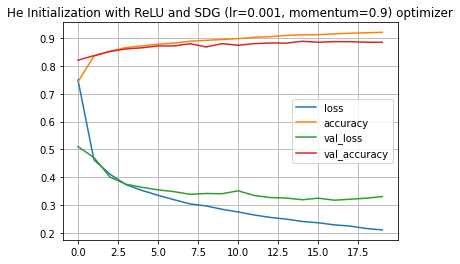

In [0]:
# ReLU goes with he initialization, SGD(lr=0.001, momentum=0.9) optimizer
tf.random.set_seed(50)
np.random.seed(50)

optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9)
history = tune_opt_model(optimizer=optimizer, epochs = 40)

train_loss_mom = history.history["loss"]
val_loss_mom = history.history["val_loss"]
train_acc_mom = history.history["accuracy"]
val_acc_mom = history.history["val_accuracy"]

plot_result(history, name='He Initialization with ReLU and SDG (lr=0.001, momentum=0.9) optimizer')

In [0]:
epoch_no = list(range(1,41))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(epoch_no, train_loss_SDG, marker = 'x')
plt.plot(epoch_no, train_loss_mom)
plt.plot(epoch_no, train_acc_SDG, marker = 'x')
plt.plot(epoch_no, train_acc_mom)
plt.legend(["SGD Loss", "Momentum Loss","SGD Accuracy", "Momentum Accuracy"])
plt.xlabel('Number of epochs')
#plt.ylim((0.2,1))
plt.title("Compare SDG and Momentum")
plt.show()

Epoch 1/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.7354 - accuracy: 0.7461 - val_loss: 0.5505 - val_accuracy: 0.8102
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4526 - accuracy: 0.8414 - val_loss: 0.4263 - val_accuracy: 0.8518
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4043 - accuracy: 0.8574 - val_loss: 0.4096 - val_accuracy: 0.8507
Epoch 4/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3705 - accuracy: 0.8680 - val_loss: 0.3684 - val_accuracy: 0.8643
Epoch 5/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3486 - accuracy: 0.8738 - val_loss: 0.3710 - val_accuracy: 0.8620
Epoch 6/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3308 - accuracy: 0.8791 - val_loss: 0.3512 - val_accuracy: 0.8730
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3153 - accuracy: 0.8848 - val_loss: 0.3411 - val_accuracy:

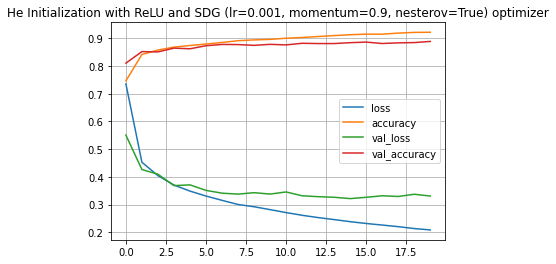

In [0]:
# ReLU goes with he initialization, SGD(lr=0.001, momentum=0.9) optimizer with nesterov is activated 
tf.random.set_seed(50)
np.random.seed(50)

optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9,nesterov=True)
history = tune_opt_model(optimizer=optimizer, epochs = 40)

train_loss_NAG = history.history["loss"]
val_loss_NAG = history.history["val_loss"]
train_acc_NAG = history.history["accuracy"]
val_acc_NAG = history.history["val_accuracy"]

plot_result(history, name='He Initialization with ReLU and SDG (lr=0.001, momentum=0.9, nesterov=True) optimizer')

Epoch 1/20
1688/1688 [==============================] - 6s 4ms/step - loss: 1.1734 - accuracy: 0.6106 - val_loss: 0.7001 - val_accuracy: 0.7645
Epoch 2/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6326 - accuracy: 0.7845 - val_loss: 0.5734 - val_accuracy: 0.8030
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5541 - accuracy: 0.8112 - val_loss: 0.5375 - val_accuracy: 0.8133
Epoch 4/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5172 - accuracy: 0.8237 - val_loss: 0.5100 - val_accuracy: 0.8225
Epoch 5/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4943 - accuracy: 0.8290 - val_loss: 0.4893 - val_accuracy: 0.8287
Epoch 6/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4776 - accuracy: 0.8353 - val_loss: 0.4778 - val_accuracy: 0.8342
Epoch 7/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4643 - accuracy: 0.8392 - val_loss: 0.4683 - val_accuracy:

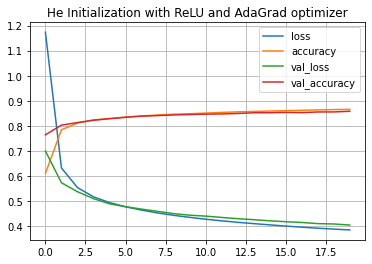

In [0]:
# ReLU goes with he initialization, AdaGrad optimizer
tf.random.set_seed(50)
np.random.seed(50)

optimizer=keras.optimizers.Adagrad(lr=0.001)
history = tune_opt_model(optimizer=optimizer, epochs = 40)

train_loss_adagrad = history.history["loss"]
val_loss_adagrad = history.history["val_loss"]
train_acc_adagrad = history.history["accuracy"]
val_acc_adagrad = history.history["val_accuracy"]

plot_result(history, name='He Initialization with ReLU and AdaGrad optimizer')

Epoch 1/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5526 - accuracy: 0.7976 - val_loss: 0.4809 - val_accuracy: 0.8300
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4171 - accuracy: 0.8519 - val_loss: 0.4772 - val_accuracy: 0.8497
Epoch 3/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3897 - accuracy: 0.8639 - val_loss: 0.5769 - val_accuracy: 0.8125
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3834 - accuracy: 0.8700 - val_loss: 0.3812 - val_accuracy: 0.8670
Epoch 5/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3814 - accuracy: 0.8712 - val_loss: 0.4405 - val_accuracy: 0.8682
Epoch 6/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3823 - accuracy: 0.8736 - val_loss: 0.4298 - val_accuracy: 0.8643
Epoch 7/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3858 - accuracy: 0.8741 - val_loss: 0.4666 - val_accuracy:

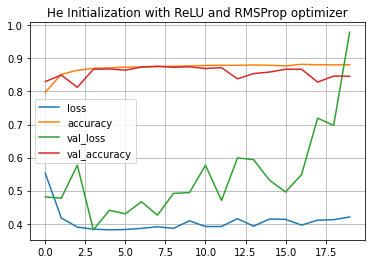

In [0]:
# ReLU goes with he initialization, RMSProp optimizer
tf.random.set_seed(50)
np.random.seed(50)

optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.99)
history = tune_opt_model(optimizer=optimizer, epochs = 40)

train_loss_rmsprop = history.history["loss"]
val_loss_rmsprop = history.history["val_loss"]
train_acc_rmsprop = history.history["accuracy"]
val_acc_rmsprop = history.history["val_accuracy"]

plot_result(history, name='He Initialization with ReLU and RMSProp optimizer')

In [0]:
epoch_no = list(range(1,41))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(epoch_no, train_loss_adagrad, marker = 'x')
plt.plot(epoch_no, train_loss_rmsprop)
plt.plot(epoch_no, train_acc_adagrad, marker = 'x')
plt.plot(epoch_no, train_acc_rmsprop)
plt.legend(["Adagrad Loss", "RMSprop Loss","Adagrad Accuracy", "RMSprop Accuracy"])
plt.xlabel('Number of epochs')
#plt.ylim((0.2,1))
plt.title("Compare Adagrad and RMSprop")
plt.show()

Epoch 1/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5276 - accuracy: 0.8099 - val_loss: 0.4579 - val_accuracy: 0.8387
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3824 - accuracy: 0.8601 - val_loss: 0.3856 - val_accuracy: 0.8597
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3482 - accuracy: 0.8727 - val_loss: 0.4057 - val_accuracy: 0.8562
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3233 - accuracy: 0.8825 - val_loss: 0.3356 - val_accuracy: 0.8827
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3066 - accuracy: 0.8868 - val_loss: 0.3537 - val_accuracy: 0.8698
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2902 - accuracy: 0.8918 - val_loss: 0.3428 - val_accuracy: 0.8810
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2791 - accuracy: 0.8963 - val_loss: 0.3267 - val_accuracy:

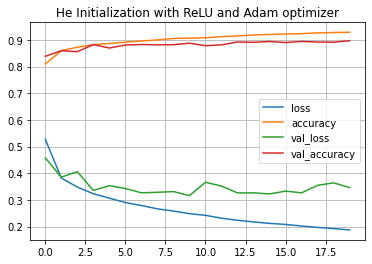

In [0]:
# ReLU goes with he initialization, Adam optimizer
tf.random.set_seed(50)
np.random.seed(50)

optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
history = tune_opt_model(optimizer=optimizer, epochs = 40)

train_loss_adam = history.history["loss"]
val_loss_adam = history.history["val_loss"]
train_acc_adam = history.history["accuracy"]
val_acc_adam = history.history["val_accuracy"]

plot_result(history, name='He Initialization with ReLU and Adam optimizer')

In [0]:
epoch_no = list(range(1,41))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(epoch_no, train_loss_adagrad, marker = 'x', color="#070bf2")
plt.plot(epoch_no, train_loss_rmsprop, marker = 'o', color="#5fd406")
plt.plot(epoch_no, train_loss_adam, marker = 'v', color="#fc0808")
plt.plot(epoch_no, train_acc_adagrad, color="#070bf2")
plt.plot(epoch_no, train_acc_rmsprop, color="#5fd406")
plt.plot(epoch_no, train_acc_adam, color="#fc0808")
plt.legend(["Adagrad Loss", "RMSprop Loss","Adam Loss", "Adagrad Accuracy", "RMSprop Accuracy", "Adam Accuracy"])
plt.xlabel('Number of epochs')
#plt.ylim((0.2,1))
plt.title("Compare Adagrad, RMSprop and Adam")
plt.show()

Epoch 1/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5586 - accuracy: 0.8050 - val_loss: 0.4509 - val_accuracy: 0.8433
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3934 - accuracy: 0.8592 - val_loss: 0.4268 - val_accuracy: 0.8533
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3535 - accuracy: 0.8726 - val_loss: 0.3583 - val_accuracy: 0.8688
Epoch 4/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3240 - accuracy: 0.8814 - val_loss: 0.3420 - val_accuracy: 0.8742
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3056 - accuracy: 0.8864 - val_loss: 0.3339 - val_accuracy: 0.8752
Epoch 6/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2847 - accuracy: 0.8945 - val_loss: 0.3238 - val_accuracy: 0.8827
Epoch 7/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2710 - accuracy: 0.8990 - val_loss: 0.3145 - val_accuracy:

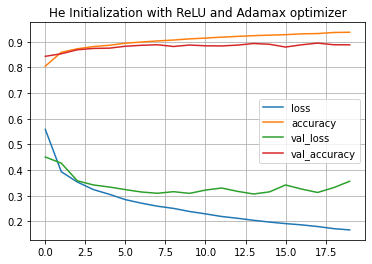

In [0]:
# ReLU goes with he initialization, Adamax optimizer
tf.random.set_seed(50)
np.random.seed(50)

optimizer=keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)
history = tune_opt_model(optimizer=optimizer, epochs = 40)

train_loss_adamax = history.history["loss"]
val_loss_adamax = history.history["val_loss"]
train_acc_adamax = history.history["accuracy"]
val_acc_adamax = history.history["val_accuracy"]

plot_result(history, name='He Initialization with ReLU and Adamax optimizer')

Epoch 1/20
1688/1688 [==============================] - 11s 6ms/step - loss: 0.5113 - accuracy: 0.8140 - val_loss: 0.4331 - val_accuracy: 0.8418
Epoch 2/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3686 - accuracy: 0.8661 - val_loss: 0.3784 - val_accuracy: 0.8628
Epoch 3/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3317 - accuracy: 0.8776 - val_loss: 0.3952 - val_accuracy: 0.8573
Epoch 4/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3069 - accuracy: 0.8863 - val_loss: 0.3284 - val_accuracy: 0.8813
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2911 - accuracy: 0.8930 - val_loss: 0.3447 - val_accuracy: 0.8755
Epoch 6/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2770 - accuracy: 0.8966 - val_loss: 0.3352 - val_accuracy: 0.8788
Epoch 7/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2689 - accuracy: 0.8992 - val_loss: 0.3104 - val_ac

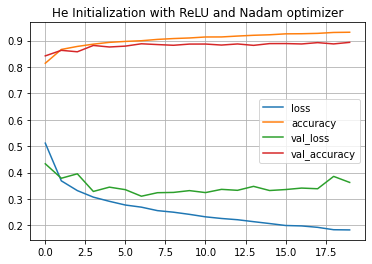

In [0]:
# ReLU goes with he initialization, Nadam optimizer
tf.random.set_seed(50)
np.random.seed(50)

optimizer=keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
history = tune_opt_model(optimizer=optimizer, epochs = 40)

train_loss_nadam = history.history["loss"]
val_loss_nadam = history.history["val_loss"]
train_acc_nadam = history.history["accuracy"]
val_acc_nadam = history.history["val_accuracy"]

plot_result(history, name='He Initialization with ReLU and Nadam optimizer')

## Regression task

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
def tune_opt_reg(optimizer):
  model_default = keras.models.Sequential()
  for n_layers in (100, 50, 10, 10, 10):
    model_default.add(keras.layers.Dense(n_layers, activation="relu", 
                                         input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
  model_default.add(keras.layers.Dense(1))
    
  model_default.compile(loss="mean_squared_error",
                        optimizer=optimizer)
  start_time = time.time()
  history = model_default.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))
  print("--- %s seconds ---" % (time.time() - start_time))
  return history

In [0]:
# He Initialization with Randomized ReLU activation function
tf.random.set_seed(42)
np.random.seed(42)

optimizer=keras.optimizers.SGD(lr=1e-3)
history = tune_opt_reg(optimizer=optimizer)

train_loss_SGD = history.history["loss"]
val_loss_SGD = history.history["val_loss"]

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 2.0828 - val_loss: 1.1610
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6848 - val_loss: 0.6265
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5257 - val_loss: 0.5508
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4762 - val_loss: 0.5006
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4463 - val_loss: 0.4633
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4243 - val_loss: 0.4480
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4104 - val_loss: 0.4246
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3998 - val_loss: 0.4147
Epoch 9/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3899 - val_loss: 0.4028
Epoch 10/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3832 - val_loss: 0.3895

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.7076 - val_loss: 0.3971
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4014 - val_loss: 2.1732
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4569 - val_loss: 0.4523
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3759 - val_loss: 0.3447
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3583 - val_loss: 0.3524
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3527 - val_loss: 0.3439
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3472 - val_loss: 0.3277
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3421 - val_loss: 0.3271
Epoch 9/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3381 - val_loss: 0.3262
Epoch 10/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3315 - val_loss: 0.3191

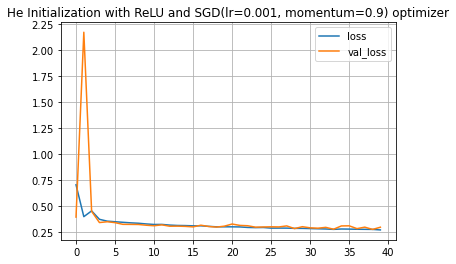

In [0]:
# ReLU goes with he initialization, SGD(lr=0.001, momentum=0.9) optimizer
tf.random.set_seed(42)
np.random.seed(42)

optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9)
history = tune_opt_reg(optimizer=optimizer)
plot_result(history, name='He Initialization with ReLU and SGD(lr=0.001, momentum=0.9) optimizer')

train_loss_momentum = history.history["loss"]
val_loss_momentum = history.history["val_loss"]

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6607 - val_loss: 0.5097
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4028 - val_loss: 0.7861
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3936 - val_loss: 0.8609
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3786 - val_loss: 0.6315
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3593 - val_loss: 0.3521
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3660 - val_loss: 1.4020
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4044 - val_loss: 0.3453
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3449 - val_loss: 0.3617
Epoch 9/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3367 - val_loss: 0.3190
Epoch 10/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3288 - val_loss: 0.3640

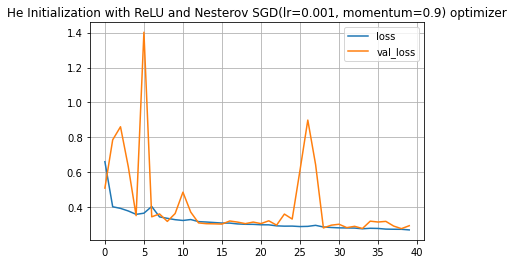

In [0]:
# ReLU goes with he initialization, Nesterov SGD(lr=0.001, momentum=0.9) optimizer
tf.random.set_seed(42)
np.random.seed(42)
optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
history = tune_opt_reg(optimizer=optimizer)

train_loss_nesterov = history.history["loss"]
val_loss_nesterov = history.history["val_loss"]

plot_result(history, name='He Initialization with ReLU and Nesterov SGD(lr=0.001, momentum=0.9) optimizer')

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 2.7734 - val_loss: 8.2066
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 1.1880 - val_loss: 6.1212
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.9599 - val_loss: 4.5743
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.8489 - val_loss: 3.4396
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.7777 - val_loss: 2.8789
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.7281 - val_loss: 2.2909
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6920 - val_loss: 1.9037
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6661 - val_loss: 1.5911
Epoch 9/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6452 - val_loss: 1.4505
Epoch 10/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6276 - val_loss: 1.4164

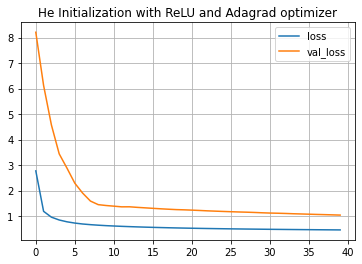

In [0]:
# ReLU goes with he initialization, Adagrad optimizer
tf.random.set_seed(42)
np.random.seed(42)

optimizer=keras.optimizers.Adagrad(lr=0.001)
history = tune_opt_reg(optimizer=optimizer)
train_loss_adagrad = history.history["loss"]
val_loss_adagrad = history.history["val_loss"]
plot_result(history, name='He Initialization with ReLU and Adagrad optimizer')

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.8108 - val_loss: 0.8561
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3970 - val_loss: 3.9756
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3772 - val_loss: 0.4209
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3484 - val_loss: 0.3871
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3411 - val_loss: 0.3845
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3248 - val_loss: 0.3236
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3223 - val_loss: 0.4170
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3163 - val_loss: 0.3014
Epoch 9/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3158 - val_loss: 0.6239
Epoch 10/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3073 - val_loss: 0.3261

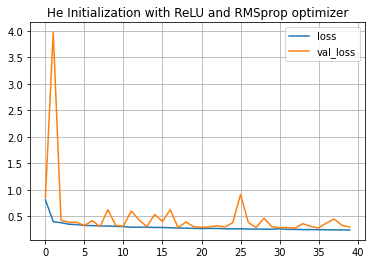

In [0]:
# ReLU goes with he initialization, RMSprop optimizer
tf.random.set_seed(42)
np.random.seed(42)

optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9)
history = tune_opt_reg(optimizer=optimizer)

train_loss_rmsprop = history.history["loss"]
val_loss_rmsprop = history.history["val_loss"]

plot_result(history, name='He Initialization with ReLU and RMSprop optimizer')

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 1.0152 - val_loss: 1.0246
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4158 - val_loss: 0.6849
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3658 - val_loss: 0.3217
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3523 - val_loss: 0.3471
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3441 - val_loss: 0.3216
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3254 - val_loss: 0.3023
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3188 - val_loss: 0.2964
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3115 - val_loss: 1.2189
Epoch 9/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3095 - val_loss: 0.2987
Epoch 10/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3017 - val_loss: 0.2824

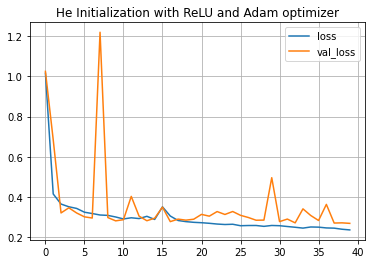

In [0]:
# ReLU goes with he initialization, Adam optimizer
tf.random.set_seed(42)
np.random.seed(42)

optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
history = tune_opt_reg(optimizer=optimizer)
train_loss_adam = history.history["loss"]
val_loss_adam = history.history["val_loss"]

plot_result(history, name='He Initialization with ReLU and Adam optimizer')

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 1.6769 - val_loss: 16.3907
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.7098 - val_loss: 9.2826
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5597 - val_loss: 5.0704
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4718 - val_loss: 3.0689
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4204 - val_loss: 2.5622
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3894 - val_loss: 2.1979
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3697 - val_loss: 1.8969
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3554 - val_loss: 1.3850
Epoch 9/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3435 - val_loss: 1.0338
Epoch 10/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3352 - val_loss: 0.806

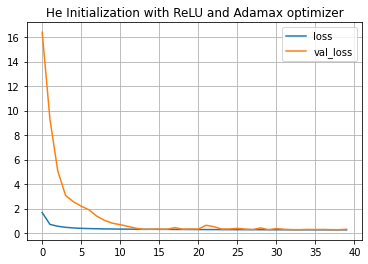

In [0]:
# ReLU goes with he initialization, Adamax optimizer
tf.random.set_seed(42)
np.random.seed(42)

optimizer=keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)
history = tune_opt_reg(optimizer=optimizer)
train_loss_adamax = history.history["loss"]
val_loss_adamax = history.history["val_loss"]
plot_result(history, name='He Initialization with ReLU and Adamax optimizer')

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.9922 - val_loss: 0.4367
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4010 - val_loss: 1.8689
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3673 - val_loss: 0.3243
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3716 - val_loss: 0.5193
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3453 - val_loss: 0.5785
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3297 - val_loss: 0.3159
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3194 - val_loss: 0.5396
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3112 - val_loss: 0.4139
Epoch 9/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3044 - val_loss: 0.2946
Epoch 10/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3042 - val_loss: 0.4474

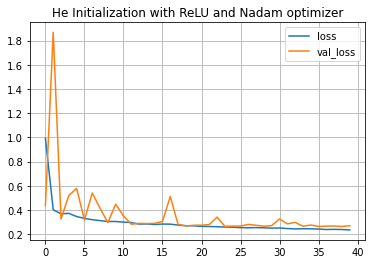

In [0]:
# ReLU goes with he initialization, Nadam optimizer
tf.random.set_seed(42)
np.random.seed(42)

optimizer=keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
history = tune_opt_reg(optimizer=optimizer)
train_loss_nadam = history.history["loss"]
val_loss_nadam = history.history["val_loss"]
plot_result(history, name='He Initialization with ReLU and Nadam optimizer')

In [0]:
train_loss = [train_loss_SGD, train_loss_momentum, train_loss_nesterov, train_loss_adagrad, train_loss_rmsprop, train_loss_adam, 
              train_loss_adamax, train_loss_nadam]
epoch_no = list(range(1,41))

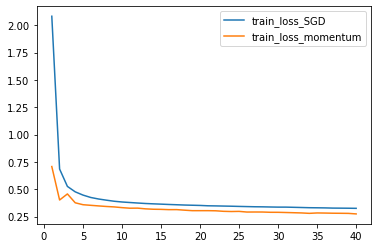

In [0]:
plt.plot(epoch_no, train_loss_SGD)
plt.plot(epoch_no, train_loss_momentum)
plt.legend(["train_loss_SGD", "train_loss_momentum"])
plt.show()

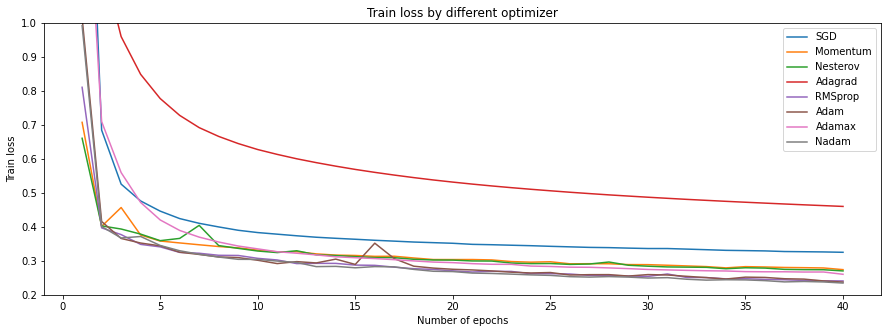

In [0]:
plt.figure(figsize=(15,5))
for opt in train_loss:
  plt.plot(epoch_no, opt)
plt.legend(["SGD", "Momentum","Nesterov", "Adagrad", "RMSprop", "Adam", "Adamax", "Nadam"])
plt.set_cmap("jet")
plt.ylabel('Train loss')
plt.xlabel('Number of epochs')
plt.ylim((0.2,1))
plt.title("Train loss by different optimizer")
plt.show()

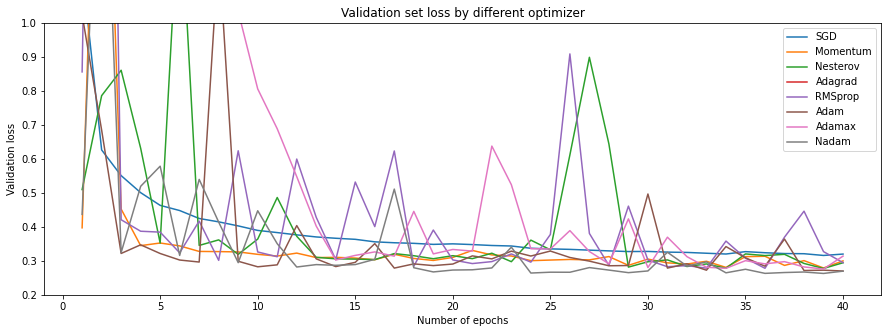

In [0]:
val_loss = [val_loss_SGD, val_loss_momentum, val_loss_nesterov, val_loss_adagrad, val_loss_rmsprop, val_loss_adam, 
              val_loss_adamax, val_loss_nadam]
plt.figure(figsize=(15,5))
for opt in val_loss:
  plt.plot(epoch_no, opt)
plt.legend(["SGD", "Momentum","Nesterov", "Adagrad", "RMSprop", "Adam", "Adamax", "Nadam"])
plt.ylabel('Validation loss')
plt.xlabel('Number of epochs')
plt.ylim((0.2,1))
plt.title("Validation set loss by different optimizer")
plt.show()